In [1]:
import numpy as np
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
modified_data = pd.read_csv('modified_dataset_all.csv')

In [3]:
modified_data.head()

,Sequence,Class
0,MKWTKRVIRYATKNRKSPAENRRRVGKSLSLLSVFVFAIFLVNFAV...,1.0
1,MRLICMRKFNSHSIPIRLNLLFSIVILLFMTIIGRLLYMQVLNKDF...,1.0
2,MNKPTILHLIKYLSISFLSLVIAAIVLGGGVFFYYVSKAPSLSESK...,1.0
3,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,1.0
4,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,1.0


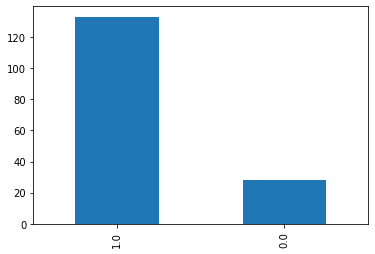

In [4]:
modified_data.Class.value_counts().sort_values(ascending=False).plot.bar()
plt.show()

In [5]:
def creation_of_BOW(Sequence, size=6):
    return [Sequence[x:x+size] for x in range(len(Sequence) - size + 1)]

In [6]:
modified_data['BOW'] = modified_data.apply(lambda x: creation_of_BOW(x['Sequence']), axis=1)
modified_data = modified_data.drop('Sequence', axis=1)

In [7]:
modified_data.head()

,Class,BOW
0,1.0,"[MKWTKR, KWTKRV, WTKRVI, TKRVIR, KRVIRY, RVIRY..."
1,1.0,"[MRLICM, RLICMR, LICMRK, ICMRKF, CMRKFN, MRKFN..."
2,1.0,"[MNKPTI, NKPTIL, KPTILH, PTILHL, TILHLI, ILHLI..."
3,1.0,"[MSIQHF, SIQHFR, IQHFRV, QHFRVA, HFRVAL, FRVAL..."
4,1.0,"[MSIQHF, SIQHFR, IQHFRV, QHFRVA, HFRVAL, FRVAL..."


In [8]:
modified_data.shape

(161, 2)

In [9]:
modified_genes = list(modified_data['BOW'])

for item in range(len(modified_genes)):
    modified_genes[item] = ' '.join(modified_genes[item])
 

In [10]:
bow_genes = pd.Series(modified_genes)

In [11]:
bow_genes

0      MKWTKR KWTKRV WTKRVI TKRVIR KRVIRY RVIRYA VIRY...
1      MRLICM RLICMR LICMRK ICMRKF CMRKFN MRKFNS RKFN...
2      MNKPTI NKPTIL KPTILH PTILHL TILHLI ILHLIK LHLI...
3      MSIQHF SIQHFR IQHFRV QHFRVA HFRVAL FRVALI RVAL...
4      MSIQHF SIQHFR IQHFRV QHFRVA HFRVAL FRVALI RVAL...
                             ...                        
156    MKNSCA KNSCAS NSCASR SCASRE CASREL ASRELS SREL...
157    MSFLIP SFLIPA FLIPAA LIPAAY IPAAYA PAAYAD AAYA...
158    MKIKLM KIKLML IKLMLV KLMLVA LMLVAG MLVAGL LVAG...
159    MTNLSR TNLSRR NLSRRS LSRRSV SRRSVL RRSVLI RSVL...
160    MSWKSY SWKSYR WKSYRV KSYRVL SYRVLV YRVLVV RVLV...
Length: 161, dtype: object

In [12]:
new_data = modified_data.assign(Modified_genes = bow_genes)

In [13]:
new_data.head()

,Class,BOW,Modified_genes
0,1.0,"[MKWTKR, KWTKRV, WTKRVI, TKRVIR, KRVIRY, RVIRY...",MKWTKR KWTKRV WTKRVI TKRVIR KRVIRY RVIRYA VIRY...
1,1.0,"[MRLICM, RLICMR, LICMRK, ICMRKF, CMRKFN, MRKFN...",MRLICM RLICMR LICMRK ICMRKF CMRKFN MRKFNS RKFN...
2,1.0,"[MNKPTI, NKPTIL, KPTILH, PTILHL, TILHLI, ILHLI...",MNKPTI NKPTIL KPTILH PTILHL TILHLI ILHLIK LHLI...
3,1.0,"[MSIQHF, SIQHFR, IQHFRV, QHFRVA, HFRVAL, FRVAL...",MSIQHF SIQHFR IQHFRV QHFRVA HFRVAL FRVALI RVAL...
4,1.0,"[MSIQHF, SIQHFR, IQHFRV, QHFRVA, HFRVAL, FRVAL...",MSIQHF SIQHFR IQHFRV QHFRVA HFRVAL FRVALI RVAL...


In [14]:
new_data = new_data.drop('BOW', axis=1)

In [15]:
new_data.head()

,Class,Modified_genes
0,1.0,MKWTKR KWTKRV WTKRVI TKRVIR KRVIRY RVIRYA VIRY...
1,1.0,MRLICM RLICMR LICMRK ICMRKF CMRKFN MRKFNS RKFN...
2,1.0,MNKPTI NKPTIL KPTILH PTILHL TILHLI ILHLIK LHLI...
3,1.0,MSIQHF SIQHFR IQHFRV QHFRVA HFRVAL FRVALI RVAL...
4,1.0,MSIQHF SIQHFR IQHFRV QHFRVA HFRVAL FRVALI RVAL...


In [16]:
new_data['Class'] = new_data['Class'].astype(int)

In [17]:
new_data.head()

,Class,Modified_genes
0,1,MKWTKR KWTKRV WTKRVI TKRVIR KRVIRY RVIRYA VIRY...
1,1,MRLICM RLICMR LICMRK ICMRKF CMRKFN MRKFNS RKFN...
2,1,MNKPTI NKPTIL KPTILH PTILHL TILHLI ILHLIK LHLI...
3,1,MSIQHF SIQHFR IQHFRV QHFRVA HFRVAL FRVALI RVAL...
4,1,MSIQHF SIQHFR IQHFRV QHFRVA HFRVAL FRVALI RVAL...


In [18]:
new_data.shape

(161, 2)

In [19]:
print(modified_genes[4])

MSIQHF SIQHFR IQHFRV QHFRVA HFRVAL FRVALI RVALIP VALIPF ALIPFF LIPFFA IPFFAA PFFAAF FFAAFC FAAFCL AAFCLP AFCLPV FCLPVF CLPVFA LPVFAH PVFAHP VFAHPE FAHPET AHPETL HPETLV PETLVK ETLVKV TLVKVK LVKVKD VKVKDA KVKDAE VKDAED KDAEDQ DAEDQL AEDQLG EDQLGA DQLGAR QLGARV LGARVG GARVGY ARVGYI RVGYIE VGYIEL GYIELD YIELDL IELDLN ELDLNS LDLNSG DLNSGK LNSGKI NSGKIL SGKILE GKILES KILESF ILESFR LESFRP ESFRPE SFRPEE FRPEER RPEERF PEERFP EERFPM ERFPMM RFPMMS FPMMST PMMSTF MMSTFK MSTFKV STFKVL TFKVLL FKVLLC KVLLCG VLLCGA LLCGAV LCGAVL CGAVLS GAVLSR AVLSRV VLSRVD LSRVDA SRVDAG RVDAGQ VDAGQE DAGQEQ AGQEQL GQEQLG QEQLGR EQLGRR QLGRRI LGRRIH GRRIHY RRIHYS RIHYSQ IHYSQN HYSQND YSQNDL SQNDLV QNDLVE NDLVEY DLVEYS LVEYSP VEYSPV EYSPVT YSPVTE SPVTEK PVTEKH VTEKHL TEKHLT EKHLTD KHLTDG HLTDGM LTDGMT TDGMTV DGMTVR GMTVRE MTVREL TVRELC VRELCS RELCSA ELCSAA LCSAAI CSAAIT SAAITM AAITMS AITMSD ITMSDN TMSDNT MSDNTA SDNTAA DNTAAN NTAANL TAANLL AANLLL ANLLLT NLLLTT LLLTTI LLTTIG LTTIGG TTIGGP TIGGPK IGGPKE GGPKEL GPKELT PKELTA

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data.Modified_genes, new_data.Class, test_size = 0.20, random_state=42)

In [21]:
X_train.shape

(128,)

In [22]:
X_test.shape

(33,)

In [23]:
y_train.shape

(128,)

In [24]:
y_test.shape

(33,)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [26]:
X_train = cv.fit_transform(X_train)

In [27]:
X_test = cv.transform(X_test)

In [28]:
from sklearn.svm import SVC

svm_clf= SVC(random_state=30)

svm_clf.fit(X_train, y_train)

SVC(random_state=30)

In [29]:
y_pred = svm_clf.predict(X_test)

In [30]:

from sklearn.calibration import CalibratedClassifierCV
proba_clf = CalibratedClassifierCV(svm_clf) 
proba_clf.fit(X_train, y_train)
y_proba = proba_clf.predict_proba(X_test)


In [31]:
y_proba

array([[0.15890371, 0.84109629],
       [0.15069415, 0.84930585],
       [0.13172043, 0.86827957],
       [0.06445177, 0.93554823],
       [0.13469116, 0.86530884],
       [0.06447909, 0.93552091],
       [0.06701786, 0.93298214],
       [0.06445177, 0.93554823],
       [0.06445941, 0.93554059],
       [0.13207907, 0.86792093],
       [0.1338639 , 0.8661361 ],
       [0.13379465, 0.86620535],
       [0.06508156, 0.93491844],
       [0.06445177, 0.93554823],
       [0.06438575, 0.93561425],
       [0.06540926, 0.93459074],
       [0.13466181, 0.86533819],
       [0.11058479, 0.88941521],
       [0.14635288, 0.85364712],
       [0.11323072, 0.88676928],
       [0.11542506, 0.88457494],
       [0.12869096, 0.87130904],
       [0.13797048, 0.86202952],
       [0.1044473 , 0.8955527 ],
       [0.06609946, 0.93390054],
       [0.12290633, 0.87709367],
       [0.13627998, 0.86372002],
       [0.06437303, 0.93562697],
       [0.13379465, 0.86620535],
       [0.13349902, 0.86650098],
       [0.

In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='binary')
    recall = recall_score(y_test, y_predicted, average='binary')
    f1 = f1_score(y_test, y_predicted, average='binary')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("Accuracy = %.3f \nPrecision = %.3f \nRecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Accuracy = 0.939 
Precision = 0.939 
Recall = 1.000 
f1 = 0.969


In [46]:
from sklearn.metrics import confusion_matrix
y_pred = svm_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  2]
 [ 0 31]]


In [33]:
pickle.dump(svm_clf, open('model1.pkl','wb'))
pickle.dump(cv, open('model2.pkl','wb'))

In [34]:
model = pickle.load(open('model1.pkl','rb'))
model = pickle.load(open('model2.pkl','rb'))

Probability Testing

In [37]:
from sklearn.calibration import CalibratedClassifierCV
proba_clf = CalibratedClassifierCV(svm_clf) 
proba_clf.fit(X_train, y_train)
y_proba = proba_clf.predict_proba(X_test)

In [38]:
y_proba

array([[0.15890371, 0.84109629],
       [0.15069415, 0.84930585],
       [0.13172043, 0.86827957],
       [0.06445177, 0.93554823],
       [0.13469116, 0.86530884],
       [0.06447909, 0.93552091],
       [0.06701786, 0.93298214],
       [0.06445177, 0.93554823],
       [0.06445941, 0.93554059],
       [0.13207907, 0.86792093],
       [0.1338639 , 0.8661361 ],
       [0.13379465, 0.86620535],
       [0.06508156, 0.93491844],
       [0.06445177, 0.93554823],
       [0.06438575, 0.93561425],
       [0.06540926, 0.93459074],
       [0.13466181, 0.86533819],
       [0.11058479, 0.88941521],
       [0.14635288, 0.85364712],
       [0.11323072, 0.88676928],
       [0.11542506, 0.88457494],
       [0.12869096, 0.87130904],
       [0.13797048, 0.86202952],
       [0.1044473 , 0.8955527 ],
       [0.06609946, 0.93390054],
       [0.12290633, 0.87709367],
       [0.13627998, 0.86372002],
       [0.06437303, 0.93562697],
       [0.13379465, 0.86620535],
       [0.13349902, 0.86650098],
       [0.

In [39]:
pickle.dump(proba_clf, open('modelprob.pkl','wb'))

In [40]:
model = pickle.load(open('modelprob.pkl','rb'))